In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
FILENAME = "full_truth.root"

pi0_v = rn.root2array(FILENAME,
                    treename='energy_tree',
                    branches=['true_pi0_e','true_angle','true_asym',\
                              'true_vtx','reco_vtx','event'])

gamma_v = rn.root2array(FILENAME,
                    treename='gamma_tree',
                    branches=['gamma_e','rad_l'])


true_e = [pi0_v[i][0] for i in xrange(pi0_v.shape[0])]
true_angle = [pi0_v[i][1] for i in xrange(pi0_v.shape[0]) if pi0_v[i][2]>-1]
true_asym = [pi0_v[i][2] for i in xrange(pi0_v.shape[0])  if pi0_v[i][2]>-1]

true_vtx = [pi0_v[i][3] for i in xrange(pi0_v.shape[0])  if pi0_v[i][2]>-1]
reco_vtx = [pi0_v[i][4] for i in xrange(pi0_v.shape[0])  if pi0_v[i][2]>-1]



gamma_e = [gamma_v[i][0] for i in xrange(gamma_v.shape[0])]

print len(true_e)

1806


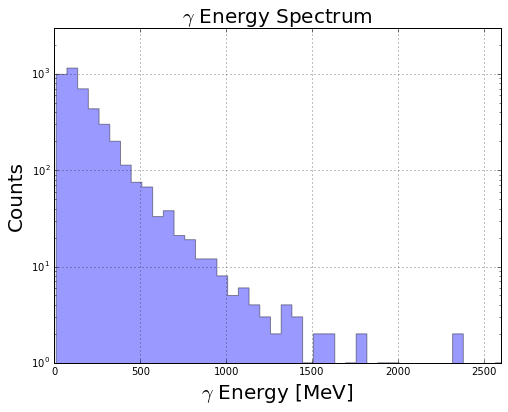

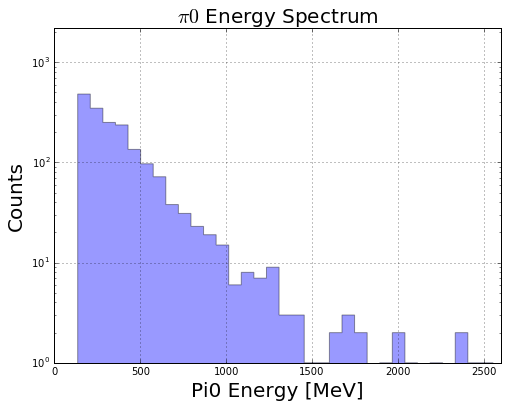

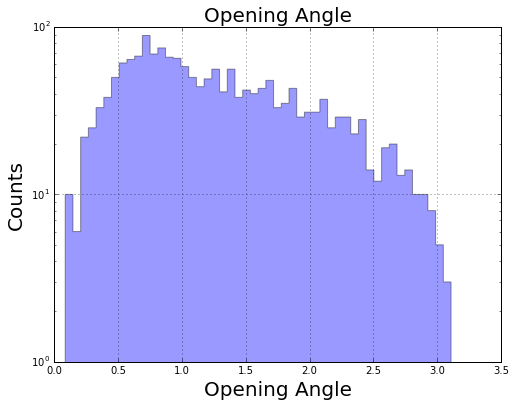

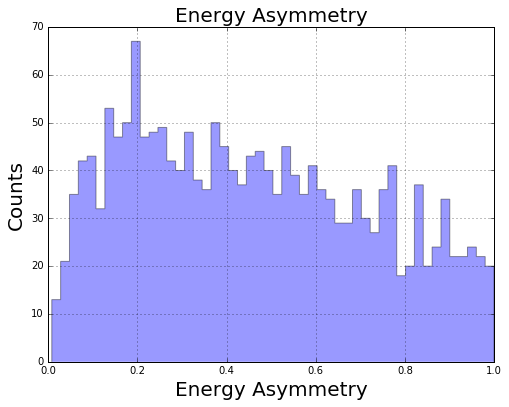

In [4]:
bins = 50

plt.figure(figsize=(8,6))
plt.hist(gamma_e,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.xlabel("$\gamma$ Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\gamma$ Energy Spectrum",fontsize=20)
plt.yscale('log')
plt.ylim(0,3000)
plt.xlim(0,2600)
plt.savefig("Plots/Full_GammaE.png")

plt.figure(figsize=(8,6))
plt.hist(true_e,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.xlabel("Pi0 Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\pi0$ Energy Spectrum",fontsize=20)
plt.yscale('log')
plt.ylim(0,2200)
plt.xlim(0,2600)
plt.savefig("Plots/Full_pi0E.png")


plt.figure(figsize=(8,6))
plt.hist(true_angle,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.title("Opening Angle",fontsize=20)
plt.xlabel("Opening Angle",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.yscale('log')
plt.savefig("Plots/Full_OpenAngle.png")

plt.figure(figsize=(8,6))
plt.hist(true_asym,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.title("Energy Asymmetry",fontsize=20)
plt.xlabel("Energy Asymmetry",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.savefig("Plots/Full_EAsym.png")
#plt.yscale('log')

In [10]:
vtx_x = [true_vtx[i][0] - reco_vtx[i][0] for i in xrange(len(true_vtx))]
vtx_y = [true_vtx[i][1] - reco_vtx[i][1] for i in xrange(len(true_vtx))]
vtx_z = [true_vtx[i][2] - reco_vtx[i][2] for i in xrange(len(true_vtx))]

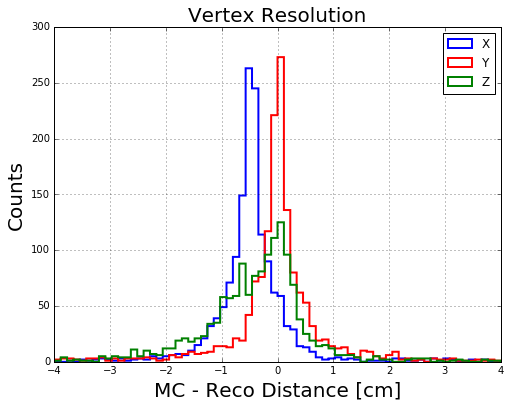

In [34]:
plt.figure(figsize=(8,6))
_ = plt.hist(vtx_x,70,range=(-4,4),histtype='step',label='X',lw=2)
_ = plt.hist(vtx_y,70,range=(-4,4),histtype='step',label='Y',lw=2,edgecolor='r')
_ = plt.hist(vtx_z,70,range=(-4,4),histtype='step',label='Z',lw=2,edgecolor='g')


plt.xlabel("MC - Reco Distance [cm]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Vertex Resolution",fontsize=20)
#plt.yscale('log')
plt.grid(True)
plt.legend()
plt.savefig("Plots/Full_VtxResolution.png")